In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#import matplotlib.pyplot as plt

# Import decision tree classifier
from sklearn.tree import DecisionTreeClassifier
# Import train_test split function
from sklearn.model_selection import train_test_split
# Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics 

%matplotlib inline
data = pd.read_csv("./cleanedv1.csv")
df = data

In [2]:
df

,community,age,weight1,history,HB,IFA,BP1,res,reslt
0,1,26.000000,37.000000,1,5.900000,1,1.444444,1,0
1,1,21.000000,42.000000,1,9.200000,1,1.375000,1,0
2,1,21.000000,36.071429,1,8.800000,1,1.500000,1,0
3,1,21.000000,36.071429,1,9.200000,1,2.125000,1,0
4,1,21.000000,36.071429,1,8.000000,1,1.375000,1,0
5,1,24.000000,33.000000,1,9.300000,1,1.571000,1,0
6,1,26.000000,35.000000,1,9.200000,1,1.571429,1,0
7,4,26.000000,31.000000,1,9.022222,1,1.625000,1,0
8,3,21.000000,36.071429,1,11.000000,1,1.375000,1,0
9,1,22.000000,30.000000,1,9.022222,1,1.571000,1,0


In [3]:
feature_cols = ['community', 'age', 'weight1', 'history','HB','IFA','BP1', 'res']
#data.to_csv("cleanedv1KNN.csv")
# Features
X = data[feature_cols] 
#print(X)
# Target varibale
y = data['reslt']
from myKNN import *
weights = [0.04443233234214417, -0.024847621647369884, 0.5449535222905776, -0.07885807598072059, 0.005079960190242526, 0.16241303661498857, -0.036131885629758505, 0.09105601219402526]
#weights = [-1*j for j in weights]
base = min(weights)
Range = max(weights) - base
normalized = [(x-base)/Range for x in weights]
weights = normalized


In [4]:
from sklearn.model_selection import KFold
kf = KFold(5, True)
kf.get_n_splits(X)
average_sk_knn = 0
average_my_knn1 = 0
average_my_knn2 = 0
average_my_knn3 = 0
average_my_knn_weighted = 0
from sklearn.neighbors import KNeighborsClassifier
 
for i in range(10):
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        clf = KNeighborsClassifier(n_neighbors=7)
        clf = clf.fit(X_train,y_train)
        y_pred = clf.predict(X_test)
        y_dt = y_pred
        average_sk_knn+=metrics.accuracy_score(y_test, y_pred)
        
        
        y_pred = myknn_eucledian(X_train,y_train,X_test,7)
        #print(y_pred)
        average_my_knn1+=metrics.accuracy_score(y_test, y_pred)
        
        y_pred = myknn_manhattan(X_train,y_train,X_test,7)
        #print(y_pred)
        average_my_knn2+=metrics.accuracy_score(y_test, y_pred)
        
        y_pred = myknn_minkowski(1,X_train,y_train,X_test,7)
        #print(y_pred)
        average_my_knn3+=metrics.accuracy_score(y_test, y_pred)
        
        y_pred = myknn_weighted(X_train,y_train,X_test,8,weights)
        #print(y_pred)
        average_my_knn_weighted+=metrics.accuracy_score(y_test, y_pred)
        
        
        
        
        

        


In [5]:
print("Average Accuracy SK KNN:- ",average_sk_knn/50)
print("Average Accuracy MY KNN euc:- ",average_my_knn1/50)
print("Average Accuracy MY KNN man:- ",average_my_knn2/50)
print("Average Accuracy MY KNN min:- ",average_my_knn3/50)

print("Average Accuracy MY KNN weighted:- ",average_my_knn_weighted/50)


Average Accuracy SK KNN:-  0.8988095238095236
Average Accuracy MY KNN euc:-  0.872904761904762
Average Accuracy MY KNN man:-  0.872904761904762
Average Accuracy MY KNN min:-  0.872904761904762
Average Accuracy MY KNN weighted:-  0.9107619047619043


In [6]:
def myknn(x_train,y_train,x_test,k):
    x_train = x_train.values.tolist()
    y_train = y_train.values.tolist()
    x_test = x_test.values.tolist()
    result = []
    for i in range(len(x_test)):
        distance =[]
        for k1 in range(len(x_train)):
            dist = 0
            for j in range(len(x_train[k1])):
                dist+=(x_test[i][j]-x_train[k1][j])*(x_test[i][j]-x_train[k1][j])
            distance.append((dist,k1))
        distance.sort()
        distance = distance[:k]
        countzero = 0
        countone = 0
        for w in distance:
            #print(w)
            #print(y_train[w[1]])
            #print("done")
            if(y_train[w[1]] == 0):
                countzero+=1
#                 print("########here#####")
            else:
                countone+=1
        if(countzero>countone):
            result.append(0)
            #print("########here#####")
        else:
            result.append(1)
    return pd.DataFrame(result)
            
            
            
     

In [7]:
import random
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random.randint(1,100))
#print(y_train.value_counts().to_dict()[0])
while(y_train.value_counts().to_dict()[0]<=20 or y_train.value_counts().to_dict()[1]<=20 ):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random.randint(1,100))


y_pred = myknn(X_train,y_train,X_test,7)
#print(y_pred)
print(metrics.accuracy_score(y_test, y_pred))

0.9047619047619048


In [8]:
def myknn(x_train,y_train,x_test,k,weights):
    x_train = x_train.values.tolist()
    y_train = y_train.values.tolist()
    x_test = x_test.values.tolist()
    result = []
    for i in range(len(x_test)):
        distance =[]
        for k1 in range(len(x_train)):
            dist = 0
            for j in range(len(x_train[k1])):
                dist+=(x_test[i][j]-x_train[k1][j])*(x_test[i][j]-x_train[k1][j])*weights[j]
            distance.append((dist,k1))
        distance.sort()
        distance = distance[:k]
        countzero = 0
        countone = 0
        for w in distance:
            #print(w)
            #print(y_train[w[1]])
            #print("done")
            if(y_train[w[1]] == 0):
                countzero+=1
#                 print("########here#####")
            else:
                countone+=1
        if(countzero>countone):
            result.append(0)
            #print("########here#####")
        else:
            result.append(1)
    return pd.DataFrame(result)
            
            
            
     

In [9]:
#weights = [1]*8
weights = [0.04443233234214417, -0.024847621647369884, 0.5449535222905776, -0.07885807598072059, 0.005079960190242526, 0.16241303661498857, -0.036131885629758505, 0.09105601219402526]
#weights = [-1*j for j in weights]
base = min(weights)
Range = max(weights) - base
normalized = [(x-base)/Range for x in weights]
weights = normalized
print(weights)
import random
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random.randint(1,100))
while(y_train.value_counts().to_dict()[0]<=20 or y_train.value_counts().to_dict()[1]<=20 ):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random.randint(1,100))


y_pred = myknn(X_train,y_train,X_test,7,weights)
#print(y_pred)
print(metrics.accuracy_score(y_test, y_pred))

[0.19764045533062574, 0.08658135642720344, 1.0, 0.0, 0.13455670975591275, 0.38676919964989076, 0.0684921384427038, 0.27238045692899976]
0.9047619047619048


In [10]:
from sklearn.model_selection import KFold
kf = KFold(5, True)
kf.get_n_splits(X)
average_sk_knn = 0
average_my_knn1 = 0
average_my_knn2 = 0
average_my_knn3 = 0
from sklearn.neighbors import KNeighborsClassifier
 
for i in range(10):
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        clf = KNeighborsClassifier(n_neighbors=7)
        clf = clf.fit(X_train,y_train)
        y_pred = clf.predict(X_test)
        y_dt = y_pred
        average_sk_knn+=metrics.accuracy_score(y_test, y_pred)
        
        
        y_pred = myknn(X_train,y_train,X_test,8,weights)
        #print(y_pred)
        average_my_knn1+=metrics.accuracy_score(y_test, y_pred)
        
        y_pred = myknn_manhattan(X_train,y_train,X_test,7)
        #print(y_pred)
        average_my_knn2+=metrics.accuracy_score(y_test, y_pred)
        
        y_pred = myknn_minkowski(1,X_train,y_train,X_test,7)
        #print(y_pred)
        average_my_knn3+=metrics.accuracy_score(y_test, y_pred)
        
        
        
        
print("Average Accuracy SK KNN:- ",average_sk_knn/50)
print("Average Accuracy MY KNN:- ",average_my_knn1/50)
#print("Average Accuracy MY KNN man:- ",average_my_knn2/50)
#print("Average Accuracy MY KNN min:- ",average_my_knn3/50)

        


Average Accuracy SK KNN:-  0.9050476190476187
Average Accuracy MY KNN:-  0.9109999999999997


In [11]:
from sklearn.model_selection import KFold
kf = KFold(5, True)
kf.get_n_splits(X)
average_sk_knn = 0
average_my_knn1 = 0
average_my_knn2 = 0
average_my_knn3 = 0
average_my_knn_weighted = 0
#kweights = [2*j for j in weights]
result = []
from sklearn.neighbors import KNeighborsClassifier
for k in range(1,21):
    average_my_knn_weighted = 0
    for i in range(10):
        for train_index, test_index in kf.split(X):
            X_train, X_test = X.iloc[train_index], X.iloc[test_index]
            y_train, y_test = y.iloc[train_index], y.iloc[test_index]
            y_pred = myknn_weighted(X_train,y_train,X_test,k,weights)
            #print(y_pred)
            average_my_knn_weighted+=metrics.accuracy_score(y_test, y_pred)
        
        
    result.append(average_my_knn_weighted/50)
        
        
#print(result)
        


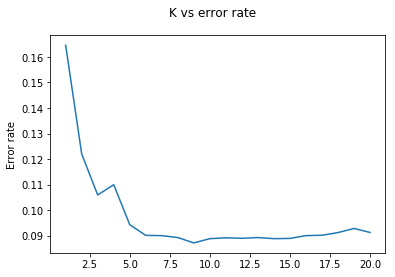

In [12]:
errorrate = [1-j for j in result]
index = [j for j in range(1,21)]
plt.plot(index,errorrate)
#plt.xlabel("K value")
plt.ylabel("Error rate")
plt.suptitle('K vs error rate')
plt.show()

In [13]:
minerror = min(errorrate)
optimalK = errorrate.index(minerror)
print(optimalK)

8
